In [8]:
import h5py
import matplotlib_inline
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from smml.kernels import GaussianKernel, PolynomialKernel
from smml.models import MulticlassPegasos, Pegasos
from smml.cross_validation import (
    KFoldCrossValidation, ParamGridCrossValidation
)
from smml.utils import (
    plot_class_counts, plot_digits, plot_error_heatmap, plot_tsne_data
)

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [2]:
PATH = '../../datasets/usps/usps.h5'
with h5py.File(PATH, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

X = np.concatenate((X_tr, X_te))
y = np.concatenate((y_tr, y_te))

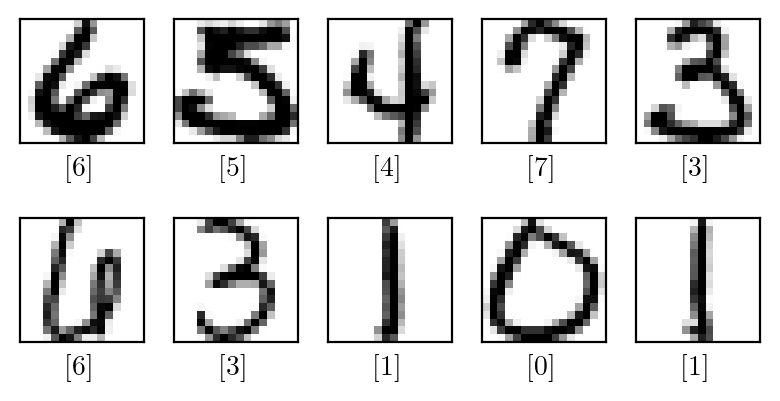

In [3]:
plot_digits(X, y, 10)

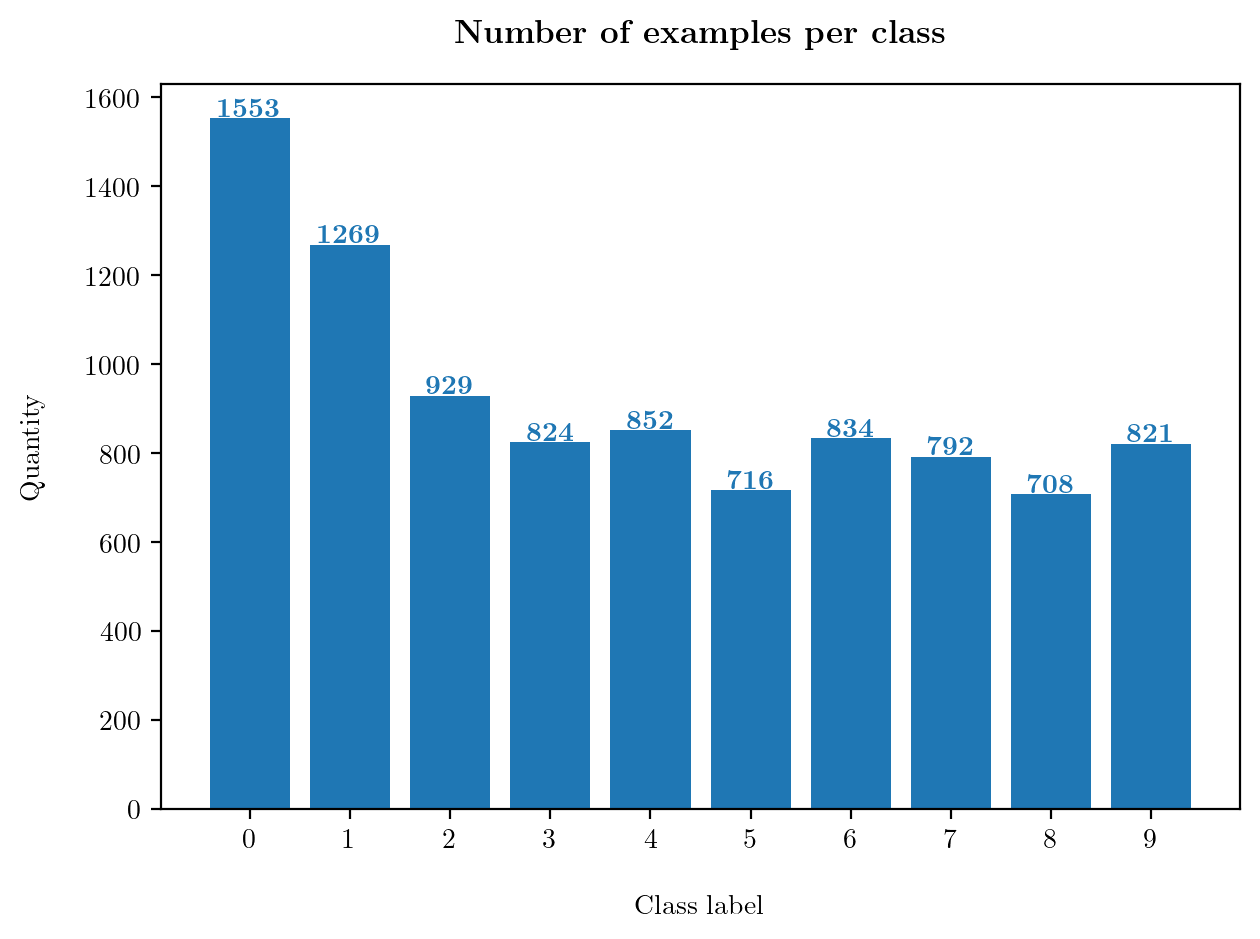

In [7]:
plot_class_counts(y)

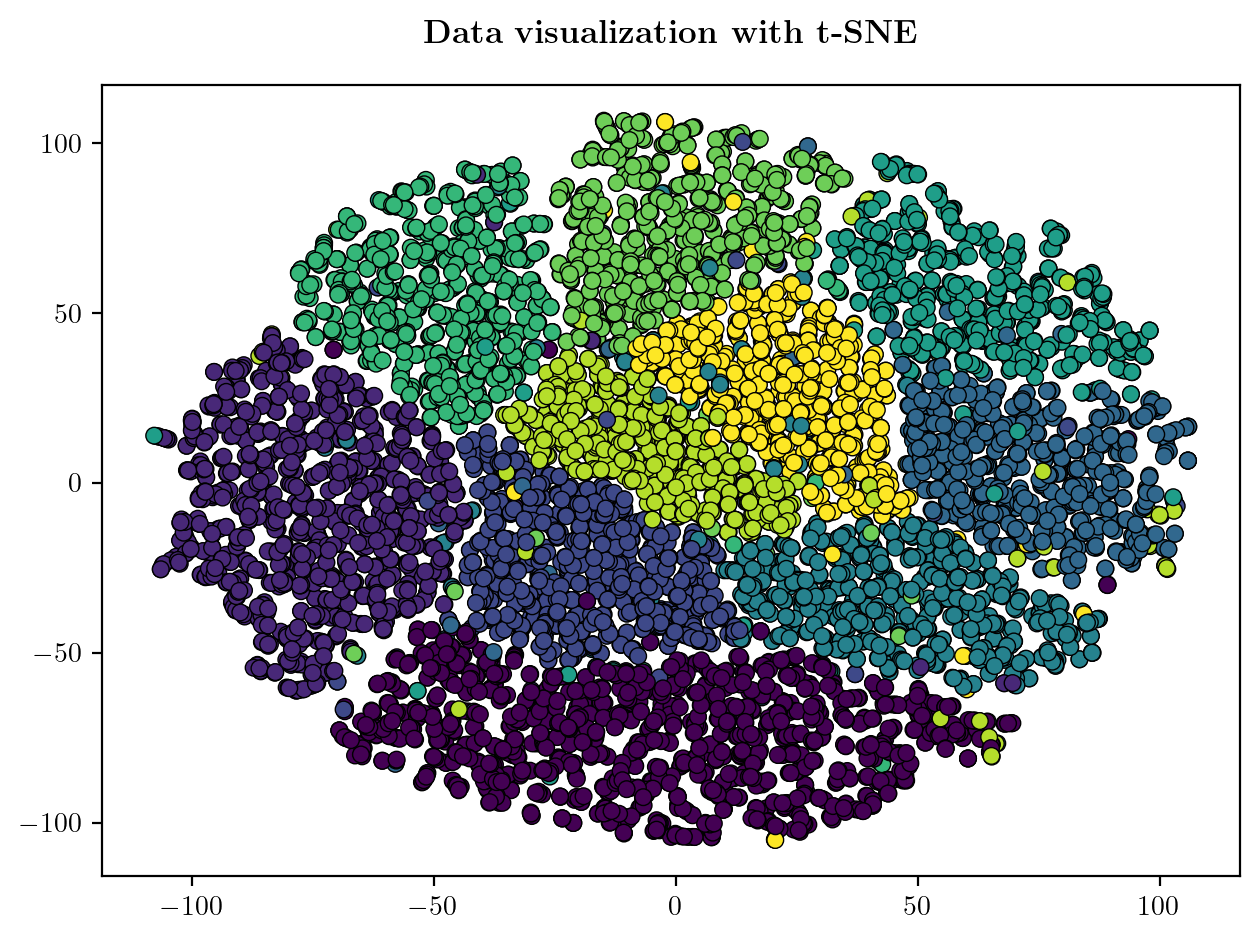

In [9]:
plot_tsne_data(X, y)

In [ ]:
N = 1000
N_test = 300
X_train = X_tr[:N]
y_train = y_tr[:N]
X_test = X_te[:N_test]
y_test = y_te[:N_test]

In [ ]:
p = Pegasos(T=16000, kernel=PolynomialKernel())

In [ ]:
p.fit(X_tr, np.where(y_tr == 8, 1, -1))

In [ ]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr, y_tr)
X_te = scaler.transform(X_te)

In [ ]:
pca = PCA(0.9)
X_tr = pca.fit_transform(X_tr, y_tr)
X_te = pca.transform(X_te)

pca.n_components_

In [ ]:
mp = MulticlassPegasos(T=32000, kernel=PolynomialKernel(n=5), seed=1)

In [ ]:
mp.fit(X_tr, y_tr)

In [ ]:
mp.score(X_te, y_te)

In [ ]:
KFoldCV = KFoldCrossValidation(5)

In [ ]:
KFoldCV.cross_validate(mp, X_train, y_train)

In [ ]:
mp = MulticlassPegasos(kernel=PolynomialKernel(n=5))
cv = KFoldCrossValidation(5)
param_grid = {'T': [2000, 5000, 10000, 20000, 50000], 
              'l': [1e-2, 1e-1, 1, 10, 100]}

In [ ]:
pgcv = ParamGridCrossValidation(mp, param_grid, cv)

In [ ]:
res = pgcv.fit(X_tr, y_tr)
res

In [ ]:
with open(r'res.txt','w+') as f:
     f.write(str(res))

In [ ]:
dic = ''
with open(r'res.txt','r') as f:
         for i in f.readlines():
            dic=i
dic = eval(dic)

In [ ]:
plot_error_heatmap(
    dic, param_grid, r'\textbf{Polynomial Kernel (degree 5)}', 
    r'Regularization coefficient ($\lambda$)', 'Number of rounds (T)', 
    'poly_5_error.svg')